**Importing the libraries**

In [10]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.models import load_model  # type: ignore
import tensorflow as tf
import kagglehub

**Extracting mfcc features from files**

In [11]:
def extract_features(path:str,genres:list,n_mfcc:int=40,max_len:int=1300):
    data=[]
    labels=[]
    
    for label,genre in enumerate(genres):
        genre_path = os.path.join(path, genre) 
        
        for fname in os.listdir(genre_path):
            if fname.endswith(".wav"):
                f_path=os.path.join(genre_path,fname)
                try:
                    y,sr=librosa.load(f_path,duration=30)
                    mfcc=librosa.feature.mfcc(y=y,sr=sr,n_mfcc=n_mfcc)
                    if mfcc.shape[1] <max_len:
                        pad_width=max_len-mfcc.shape[1]
                        mfcc=np.pad(mfcc,((0,0),(0,pad_width)),mode='constant')
                    else:
                        mfcc=mfcc[:, :max_len]
                
                    data.append(mfcc)
                    labels.append(label)
                
                except Exception as e:
                    print(f"Error: {e}")
    return np.array(data),np.array(labels)
    

**Splitting into train and test data**

In [12]:
genres=['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

path="Data/genres_original" 

X,y=extract_features(path,genres=genres)
X=X[...,np.newaxis]
y=to_categorical(y,num_classes=len(genres))

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

C:\Users\Devab\AppData\Local\Temp\ipykernel_33220\3065317053.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y,sr=librosa.load(f_path,duration=30)
c:\Users\Devab\Downloads\Music Genre Classification\venv\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error: 


**Loading the model**

In [13]:
model=load_model("Model.keras")

**Compiling the model**

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**Adding additional parameters to improve model performance**

In [15]:
early_stop=EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

checkpoints=ModelCheckpoint(
    filepath="best_model.keras",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    verbose=1
)

reduce_lr=ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    verbose=1,
    patience=5
)

**Training the model**

In [16]:
hist=model.fit(x=X_train,y=y_train,validation_data=(X_val,y_val),epochs=50,batch_size=32,
               callbacks=[early_stop,checkpoints])

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2121 - loss: 2.1740
Epoch 1: val_loss improved from inf to 2.95521, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.2152 - loss: 2.1669 - val_accuracy: 0.2000 - val_loss: 2.9552
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4077 - loss: 1.6684
Epoch 2: val_loss did not improve from 2.95521
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.4091 - loss: 1.6655 - val_accuracy: 0.1562 - val_loss: 3.2734
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4881 - loss: 1.3876
Epoch 3: val_loss improved from 2.95521 to 2.87853, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.4885 - loss: 1.3871 - val_accuracy: 0.2000 - val_loss: 2.8785
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5687 - loss: 1.2060
Epoch 4: val_loss did not improve from 2.87853
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5680 - los

In [25]:
hist=model.fit(x=X_train,y=y_train,validation_data=(X_val,y_val),epochs=10,batch_size=32,
               callbacks=[early_stop,checkpoints])

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9226 - loss: 0.2270
Epoch 1: val_loss did not improve from 0.87254
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9225 - loss: 0.2284 - val_accuracy: 0.6625 - val_loss: 1.1501
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9538 - loss: 0.1725
Epoch 2: val_loss did not improve from 0.87254
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9531 - loss: 0.1734 - val_accuracy: 0.7000 - val_loss: 1.2683
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9267 - loss: 0.1881
Epoch 3: val_loss did not improve from 0.87254
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9271 - loss: 0.1879 - val_accuracy: 0.5750 - val_loss: 1.9701
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9675 - loss: 0.1518
Epoch 4: val_loss did not improve from 0.87254
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9678 - loss: 0.1505 - val_accuracy: 0.7563 - val_loss: 1.0201
Epoch 5/10
20/20 ━━━

**Plotting the training history**

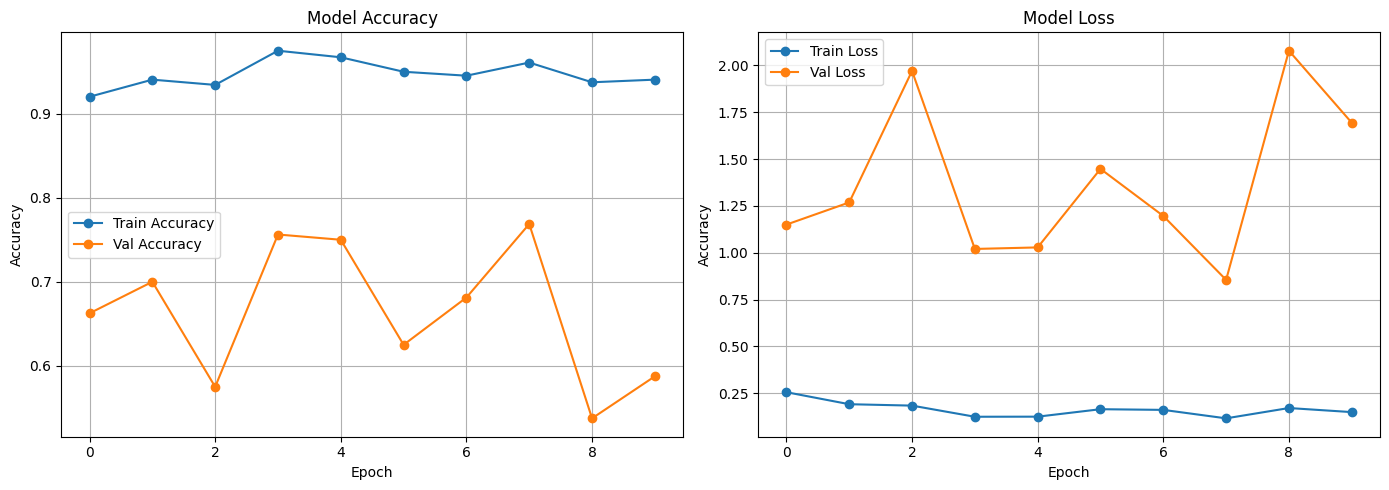

In [27]:
plt.figure(figsize=(14,5)) 

# Plotting accuracy 

plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'],label="Train Accuracy",marker='o')
plt.plot(hist.history['val_accuracy'],label="Val Accuracy",marker='o')
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


# Plotting loss 

plt.subplot(1,2,2)
plt.plot(hist.history['loss'],label="Train Loss",marker='o')
plt.plot(hist.history['val_loss'],label="Val Loss",marker='o')
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True) 

plt.tight_layout()
plt.show()

**Evaluating the model**

**Evaluation Metrics**

-> Accuracy and Loss

->

In [28]:
model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - accuracy: 0.7874 - loss: 0.7988


[0.6959985494613647, 0.8050000071525574]